## Projeto 3 C.Dados

- Daniel Gurgel Terra
- Giovanni Rozatti
- Rafael Zanfolin

**Notebook de limpeza:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zoo1 = pd.read_csv(".\Data\zoo1.csv")
zoo2 = pd.read_csv(".\Data\zoo2.csv")
zoo3 = pd.read_csv(".\Data\zoo3.csv")

zoo = pd.concat([zoo1,zoo2,zoo3]).reset_index().drop(columns='index') # Junta os df e reindexa-os
zoo.to_csv('.\Data\zoo.csv',index=False)
zoo = zoo.set_index(zoo['animal_name'])
del zoo['animal_name']
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**Classes**

In [3]:
Classification = {"Mammal":1, "Bird":2, "Reptile":3, "Fish":4, "Anphibian":5, "Bug":6, "Invertebrate":7}

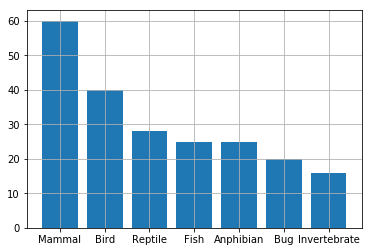

In [4]:
classes = list(Classification.keys())
count = zoo.class_type.value_counts()
plt.grid(True)
plt.bar(classes, count);

**Características de cada classe**

In [10]:
caracteristicas = list(zoo.columns)
caracteristicas.remove('class_type')
caracteristicas.remove('legs')

def contagens(tipo):
    contagem = []
    df = zoo[zoo.class_type==tipo]
    for coluna in caracteristicas:
        counts=df[coluna].value_counts()
        if 1 in counts.index:
#Divide nºde animais na classe que contém determinado atributo pelo número total de animais na classe: 
#(percentual da classe que possui determinada característica)
            contagem.append(counts[1]/counts.sum()) 
        else:
            contagem.append(0.02)
    return contagem

mammal = contagens(1)
bird = contagens(2)
reptile = contagens(3)
fish = contagens(4)
anphibian = contagens(5)
bug = contagens(6)
invertebrate = contagens(7)

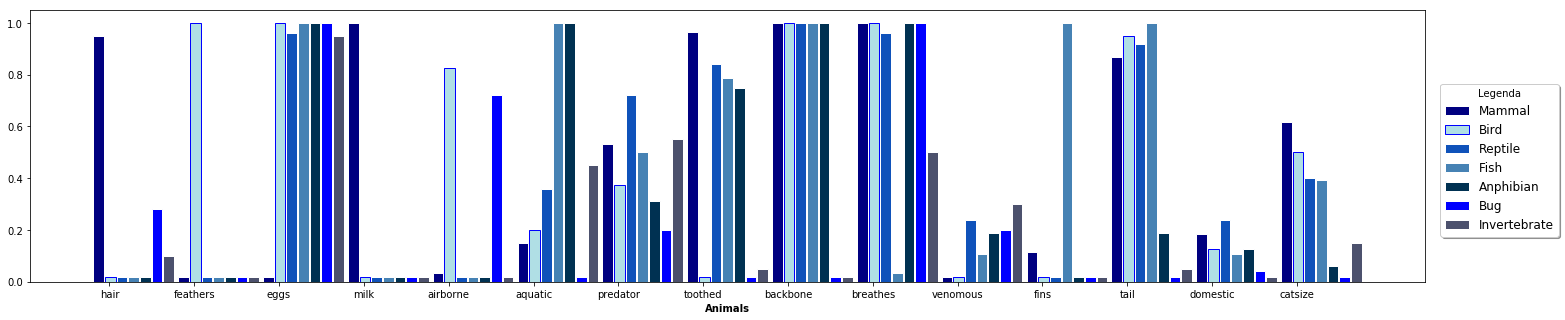

In [6]:
# Caracteristics
barWidth = .125
plt.figure(figsize=(25,5))

# Set position of bar on X axis
r1 = np.arange(len(mammal))
r2 = [x + barWidth*1.1 for x in r1]
r3 = [x + barWidth*1.1 for x in r2]
r4 = [x + barWidth*1.1 for x in r3]
r5 = [x + barWidth*1.1 for x in r4]
r6 = [x + barWidth*1.1 for x in r5]
r7 = [x + barWidth*1.1 for x in r6]

# Make the plot
plt.bar(r1, mammal, color='#000080', width=barWidth, edgecolor='white', label='Mammal')
plt.bar(r2, bird, color='#B0DFE5', width=barWidth, edgecolor='blue', label='Bird')
plt.bar(r3, reptile,color='#0F52BA', width=barWidth, edgecolor='white', label='Reptile')
plt.bar(r4, fish, color='#4682B4', width=barWidth, edgecolor='white', label='Fish')
plt.bar(r5, anphibian, color='#003152', width=barWidth, edgecolor='white', label='Anphibian')
plt.bar(r6, bug, color='b', width=barWidth, edgecolor='white', label='Bug')
plt.bar(r7, invertebrate, color='#4C516D', width=barWidth, edgecolor='white', label='Invertebrate')
 
# Add xticks on the middle of the group bars
plt.xlabel('Animals', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(mammal))], caracteristicas)
 
# Create legend & Show graphic
plt.legend(title="Legenda", fontsize='large',loc='best', bbox_to_anchor=(1.1, 0.75, 0, 0),
           shadow=True,fancybox=True,)
plt.show()

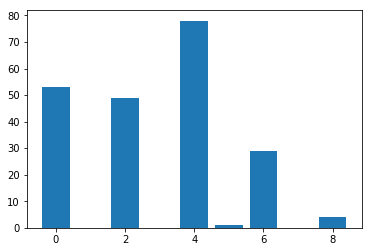

In [7]:
patas = zoo.legs.value_counts()
plt.bar(patas.index, patas);

In [8]:
#df = zoo.loc[:, colunas]
#import seaborn as sns
#%matplotlib inline

In [9]:
#sns.set(style="ticks")
#sns.pairplot(zoo, hue="class_type", x_vars=colunas, y_vars=colunas)